In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import named_colors, mpl_loc, fancy_legend, load_mpl_presets
import numpy as np
import math as m
import vice
from vice.toolkit.hydrodisk import hydrodiskstars
import sys
print(sys.version_info)
load_mpl_presets()

/var/home/johnson.7419.local/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=9, micro=6, releaselevel='final', serial=0)


In [9]:
h277 = hydrodiskstars([0.1 * _ for _ in range(201)], N = 3102519)
h277.decomp_filter([1, 2])
h277.analog_data["dr"] = [h277.analog_data["rfinal"][_] -
    h277.analog_data["rform"][_] for _ in range(len(h277.analog_data["id"]))]

In [10]:
print(h277.analog_data)
print(len(h277.analog_data["id"]))

vice.dataframe{
    id -------------> [2.69246e+07, 2.69269e+07, 2.69276e+07, ... , 3.50338e+07, 3.50339e+07, 3.50339e+07]
    tform ----------> [0.0057, 0.0577, 0.0719, ... , 13.2317, 13.2317, 13.2317]
    rform ----------> [2.4264, 0.3945, 2.5286, ... , 5.5444, 9.5923, 8.0685]
    rfinal ---------> [4.7082, 5.3455, 5.5146, ... , 5.5444, 9.5923, 8.0685]
    zform ----------> [-0.2336, -0.1723, -0.1068, ... , 0.11, -0.0823, 0.034]
    zfinal ---------> [-1.9128, -0.375, 1.2056, ... , 0.11, -0.0823, 0.034]
    vrad -----------> [254.117, -38.2215, 21.2943, ... , -17.5244, 2.4001, 7.1999]
    vphi -----------> [181.873, 114.826, 63.0829, ... , 214.747, 204.978, 202.987]
    vz -------------> [49.9099, 102.257, -108.002, ... , 0.6849, -0.2207, -0.1893]
    decomp ---------> [2, 2, 2, ... , 1, 1, 1]
    dr -------------> [2.2818, 4.951, 2.986, ... , 0, 0, 0]
}
1751765


In [14]:
xvals = np.linspace(0, 13.2, 100)
yvals = len(xvals) * [0.]
dx = 0.2
for i in range(len(xvals)):
    sub = h277.analog_data.filter("tform", ">=", xvals[i] - dx).filter("tform", "<=", xvals[i] + dx)
    if len(sub["id"]): yvals[i] = np.std(sub["dr"])
    sys.stdout.write("\r%d" % (i))
    sys.stdout.flush()
sys.stdout.write("\n")
xvals = [13.2 - _ for _ in xvals]

99


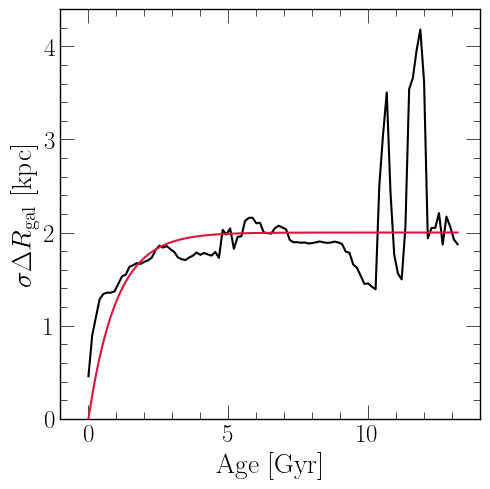

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Age [Gyr]")
ax.set_ylabel(r"$\sigma\Delta R_\text{gal}$ [kpc]")
ax.set_xlim([-1, 14])
ax.set_ylim([0, 4.4])

def fit(x):
    return 2 * (1 - m.exp(-x / 1))

ax.plot(xvals, yvals, c = named_colors()["black"])
fit_ = [fit(_) for _ in xvals]
ax.plot(xvals, fit_, c = named_colors()["crimson"])
plt.tight_layout()
plt.show()

In [38]:
xvals = np.linspace(0, 13.2, 100)
zformvals = len(xvals) * [0.]
zfinalvals = len(xvals) * [0.]
dx = 0.2
for i in range(len(xvals)):
    sub = h277.analog_data.filter("tform", ">=", xvals[i] - dx).filter("tform", "<=", xvals[i] + dx)
    if len(sub["id"]):
        zformvals[i] = np.std(sub["zform"])
        zfinalvals[i] = np.std(sub["zfinal"])
    else: pass
    sys.stdout.write("\r%d" % (i))
    sys.stdout.flush()
sys.stdout.write("\n")
xvals = [13.2 - _ for _ in xvals]

99


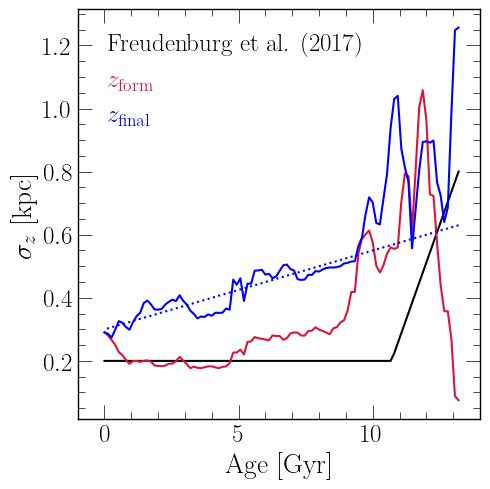

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Age [Gyr]")
ax.set_ylabel(r"$\sigma_z$ [kpc]")
ax.set_xlim([-1, 14])

def freudenburg2017(age, age_c = 13.2 - 2.5):
    if age >= age_c:
        return 0.2 + 0.24 * (age - age_c)
    else:
        return 0.2
    
def zfinalfit(age):
    return 0.025 * age + 0.3

f2017 = [freudenburg2017(_) for _ in xvals]
ax.plot(xvals, f2017, c = named_colors()["black"], label = "Freudenburg et al. (2017)")
ax.plot(xvals, zformvals, c = named_colors()["crimson"], label = r"$z_\text{form}$")
ax.plot(xvals, zfinalvals, c = named_colors()["blue"], label = r"$z_\text{final}$")
zfinal = [zfinalfit(_) for _ in xvals]
ax.plot(xvals, zfinal, c = named_colors()["blue"], linestyle = ':')

kwargs = {
    "loc": mpl_loc("upper left"),
    "ncol": 1,
    "handlelength": 0
}
leg = ax.legend(**kwargs)
fancy_legend(leg, ["black", "crimson", "blue"])

plt.tight_layout()
plt.show()

In [49]:
0.3 / 13.2

0.022727272727272728